




# Aulas 1 e 2: Representações visuais


Além de calcular quantidades numéricas como média, mediana, variância, quartis, etc., você pode usar métodos visuais para apresentar, descrever e resumir dados. Nesta seção, você aprenderá como apresentar seus dados visualmente usando os seguintes gráficos:

- Gráficos de caixa
- Histogramas
- Gráficos de pizza ou gráfisetorese pizza
- Gráficos de barra
- Gráficos XY
- Gráfico de pontos

Usaremos a biblioteca Python `matplotlib.pyplot`


Considere o banco de dados retirado do Kaggle:(Níveis de Obesidade) no qual diferentes cálculos serão realizados ao longo do restante do Caderno.


https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels



In [2]:
# Importamos as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#np.random.seed(20)


# Carregar o banco de dados
df = pd.read_csv("./data.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Tabelas de frequência para dados agrupados

As tabelas de frequência para dados agrupados são uma técnica eficaz ao trabalhar com grandes conjuntos de dados. Este método envolve a divisão dos dados em intervalos de tamanho uniforme, chamados classes. Cada classe é caracterizada por valores que indicam a frequência com que os dados ficam dentro desse intervalo.

Em uma tabela de frequência, a nota da turma é o ponto médio de cada intervalo ou turma. É calculado somando o limite inferior e o limite superior de cada classe e dividindo o resultado por 2.

### Exemplo:


Considere o banco de dados acima e a coluna `Peso`.

Calcule uma tabela de frequência para a variável 'Peso'
tomando o primeiro quartil Q1 como o limite inferior do primeiro intervalo e o terceiro quartil Q3 como o limite superior do último intervalo, o conjunto de dados fornecido. Considere um número apropriado de classes escolhendo um valor entre 5 e 20.

Discuta os resultados e apresente-os em um gráfico.

In [3]:
#Q1 e Q2
q1 = np.quantile(df['Weight'], 0.25)
q3 = np.quantile(df['Weight'], 0.75)
print(q1, q3)

65.473343 107.430682


In [4]:
#guardar tamanho do dataframe
total_linhas = len(df)

#dados filtrados
filtered_data = df[(df['Weight'] >= q1) & (df['Weight'] <= q3)]

#número de classes:
num_clases = 15

#valor mínimo:
val_min = q1

#valor máximo:
val_max = q3

#Amplitude da clase
A= (q3-q1)/num_clases
print(A)

2.797155933333334


In [5]:
# Limites da classe
limites = [q1 + A * i for i in range(num_clases+1)]

# Dataframem com as frequências
df = pd.cut(filtered_data['Weight'], bins=limites, include_lowest=True, right=False)
df = pd.value_counts(df, sort=False).reset_index()
df.columns = ['Intervalo', 'Frequência']

#Calculamos meio da classes:
df['Valor médio classe'] = df['Intervalo'].apply(lambda x: (x.left + x.right) / 2)

# Calcular  frecuencia acumulada
df['Frequência acumulada'] = df['Frequência'].cumsum()


# Calcular Frequência relativa
df['Frequência relativa'] = df['Frequência'] / total_linhas

# Calcular  Frequência relativa acumulada
df['Frequência relativa acumulada'] = df['Frequência relativa'].cumsum()


df

C:\Users\mathe\AppData\Local\Temp\ipykernel_20096\4173320293.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df = pd.value_counts(df, sort=False).reset_index()


,Intervalo,Frequência,Valor médio classe,Frequência acumulada,Frequência relativa,Frequência relativa acumulada
0,"[65.473, 68.27)",60,66.8715,60,0.028423,0.028423
1,"[68.27, 71.068)",75,69.6690,135,0.035528,0.063951
2,"[71.068, 73.865)",34,72.4665,169,0.016106,0.080057
3,"[73.865, 76.662)",85,75.2635,254,0.040265,0.120322
4,"[76.662, 79.459)",87,78.0605,341,0.041213,0.161535
5,"[79.459, 82.256)",155,80.8575,496,0.073425,0.234960
6,"[82.256, 85.053)",106,83.6545,602,0.050213,0.285173
7,"[85.053, 87.851)",65,86.4520,667,0.030791,0.315964
8,"[87.851, 90.648)",78,89.2495,745,0.036949,0.352913
9,"[90.648, 93.445)",28,92.0465,773,0.013264,0.366177


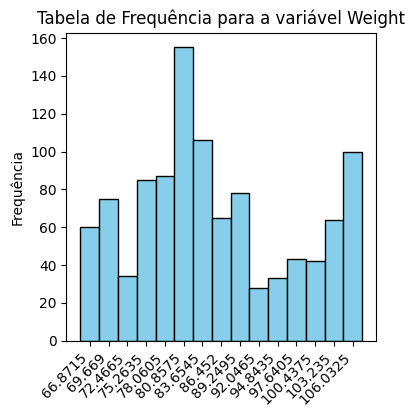

In [6]:
bins = df['Valor médio classe'].tolist()

# Frequência para cada bin
frequencies = df['Frequência'].tolist()

plt.figure(figsize=(4, 4))
plt.bar(bins, frequencies,width=A, edgecolor='black', align='center', color='skyblue')
plt.xticks(ticks=bins, labels=bins, rotation=45, ha='right')
plt.title('Tabela de Frequência para a variável Weight')
plt.ylabel('Frequência')
plt.show()

### Exemplo:

Durante várias semanas foi realizado um estudo sobre o comportamento de consumo de uma família num centro comercial. Os valores dos gastos foram registrados em diferentes categorias de produtos, como roupas, alimentos e utensílios domésticos. Os dados coletados incluem os seguintes valores em dólares:

77, 18, 63, 84, 38, 54, 50, 59, 54, 56, 36, 26, 50, 34, 44,
 41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 62, 65, 61, 52, 60, 60, 45, 66, 83, 71, 63, 58, 61

Para analisar o padrão de despesas, os dados serão organizados em uma distribuição de frequência com sete classes e um limite inferior da primeira classe de 16. Esta análise permitirá a identificação das faixas de despesas mais comuns e uma visão detalhada de como o família distribui sua renda durante suas visitas ao shopping. As informações obtidas serão valiosas para melhor compreender as preferências de compra e tomar melhores decisões nas estratégias de gestão financeira familiar.

In [7]:
pd.set_option('display.precision', 2) # Configuramos o Pandas para mostrar apenas duas casas decimais em valores numéricos


# Dados
x = [77, 18, 63, 84, 34, 59, 59, 54, 56, 36, 26, 34, 44,
        41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 65, 51, 62, 60, 68, 45, 65, 83, 71, 63, 58, 61]

#número de classes:
num_clases =7

#valor mínimo:
val_min = min(x)

#valor máximo:
val_max = max(x)

# Amplitude da classe
A = (val_max - val_min) / num_clases

# Dado que A=9,42, podemos considerar a largura da classe igual a 10 e considerar o intervalo da primeira
#classe começando em 16 para que o último intervalo tenha um limite superior de 86.

#límites de classe
limites = [16 + 10 * i for i in range(num_clases+1)]

# DataFrame com as frequências
df = pd.cut(x, bins=limites, include_lowest = True, right=False) # pd.cut() É uma função que permite dividir os dados
                                                                  # em limites diferentes

df = pd.value_counts(df, sort=False).reset_index()  #O parâmetro sort deve ser selecionado como false para não ordenar
                                                  # os intervalos em ordem decrescente de acordo com as frequências, mas
                                                  # preserva a ordem em que foram definidos

'''Após usar value_counts, o resultado pode ter um índice composto por valores distintos
do índice inteiro padrão ou pode ser baseado em uma das colunas do DataFrame.
Usar .reset_index() retorna o índice para o formato padrão e permite que as operações sejam executadas sem
sem problemas '''

df

C:\Users\mathe\AppData\Local\Temp\ipykernel_20096\3096561329.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df = pd.value_counts(df, sort=False).reset_index()  #O parâmetro sort deve ser selecionado como false para não ordenar


,index,count
0,"[16, 26)",1
1,"[26, 36)",3
2,"[36, 46)",5
3,"[46, 56)",6
4,"[56, 66)",16
5,"[66, 76)",2
6,"[76, 86)",3


In [8]:
# Renomear colunas

df.columns = ['Intervalo', 'Frequência']
# vamos calcular as diferentes frequências
# Calcular frequência cumulativa
df['Frequência acumulada'] = df['Frequência'].cumsum()

# Calcular frequência relativa
df['Frequência relativa'] = df['Frequência'] / len(x)

# Calcule a frequência relativa cumulativa
df['Frequência relativa acumulada'] = df['Frequência relativa'].cumsum()

df

,Intervalo,Frequência,Frequência acumulada,Frequência relativa,Frequência relativa acumulada
0,"[16, 26)",1,1,0.03,0.03
1,"[26, 36)",3,4,0.08,0.11
2,"[36, 46)",5,9,0.14,0.25
3,"[46, 56)",6,15,0.17,0.42
4,"[56, 66)",16,31,0.44,0.86
5,"[66, 76)",2,33,0.06,0.92
6,"[76, 86)",3,36,0.08,1.00


## Gráficos de caixa (box plot)

O boxplot é uma ferramenta visual muito útil para representar as estatísticas descritivas de um conjunto de dados. Este gráfico pode mostrar:

- O intervalo (a diferença entre o valor máximo e mínimo).
- O intervalo interquartil (a diferença entre o terceiro e o primeiro quartil).
- A mediana (o valor central do conjunto de dados).
- Outliers (dados que se desviam significativamente dos restantes).
- Todos os quartis (os pontos que dividem o conjunto de dados em quatro partes iguais).

Por outro lado, o intervalo interquartil, conhecido como IQR, oferece uma alternativa para medir a dispersão menos suscetível aos efeitos de outliers. Esta medida também é comumente usada para identificar tais valores. Em termos práticos, um valor é considerado outlier se estiver abaixo de `Q1 - 1,5 * IQR` ou acima de `Q3 + 1,5 * IQR`, onde Q1 e Q3 representam o primeiro e terceiro quartis, respectivamente. Este critério é usado para determinar o comprimento dos bigodes em um box plot.



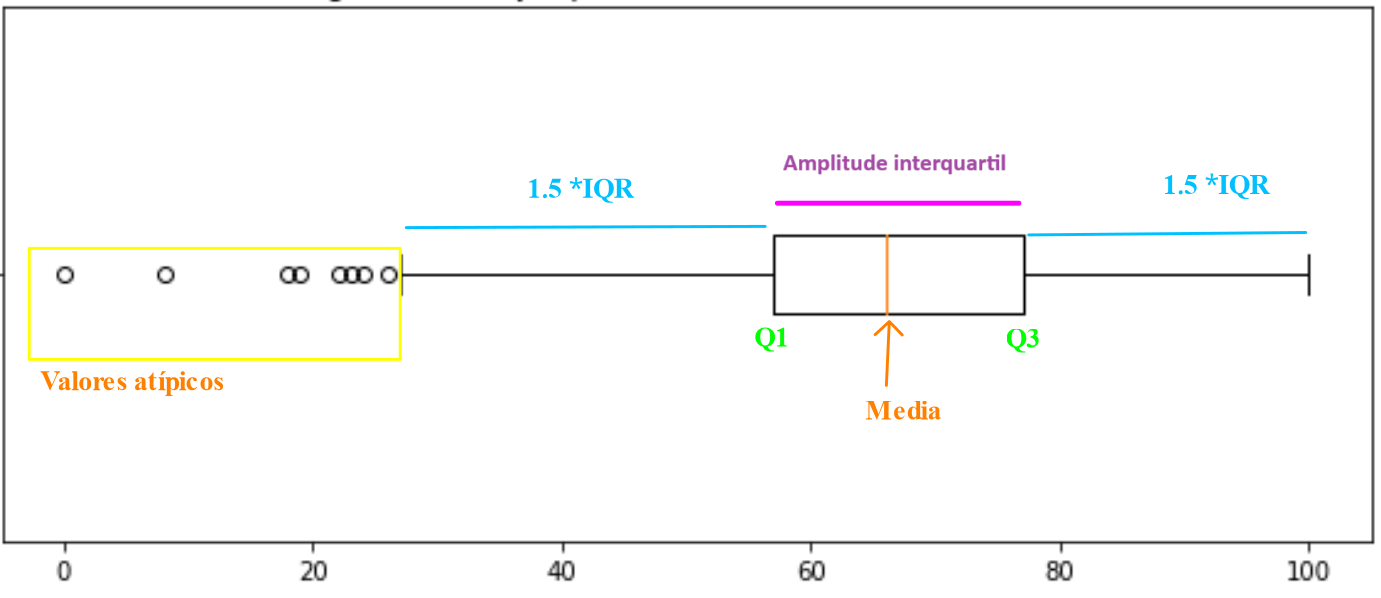

### Exemplo:

Considere o banco de dados acima e a coluna `Weight`. Faça um gráfico de barras para esta variável.

In [10]:
df = pd.read_csv("./data.csv")
#df.head()
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


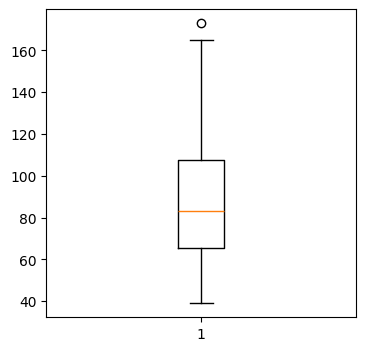

In [11]:


#carregar a coluna 'Weight'
data= df['Weight']
#tamanho da figura
fig = plt.figure(figsize =(4,4))
# criar o boxplot
plt.boxplot(data)

plt.show()

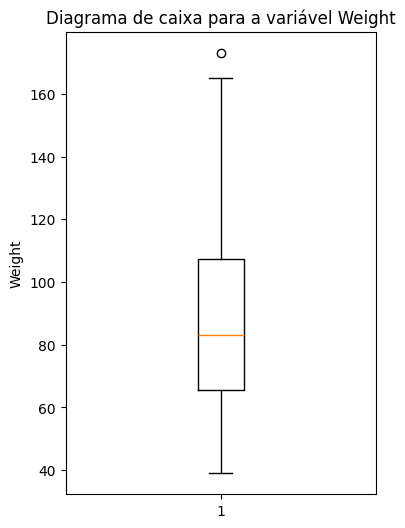

In [12]:
#Podemos adicionar maiores informações para melhorar a leitura
#Agregamos ao código novas intstruções para criar os labels.

#carregar a coluna 'Weight'
data= df['Weight']
#configurar o tamanho
fig = plt.figure(figsize =(4,6))
# criar boxplot
plt.boxplot(data)

# Título e labvels
plt.title('Diagrama de caixa para a variável Weight')    # Criar título
plt.ylabel('Weight')


plt.show()

Agora vamos fazer dois box plots para a variável `Weight`, mas segmentar os dados por gênero (`Gender`),   observar diferenças de peso entre homens e mulheres.

In [13]:
#Filtrar os dados para fazer o boxplot por gêneros

#base de dados filtrada por gênero femenino
df_female= df[df['Gender']=='Female']

#base de dados filtrada por gênero masculino
df_male= df[df['Gender']=='Male']

#selecionamos somente a coluna Weigth de cada dataframe anterior.
data_female = df_female['Weight']
data_male = df_male['Weight']

data_male.describe()

count    1068.00
mean       90.77
std        21.41
min        45.00
25%        75.00
50%        89.95
75%       108.46
max       173.00
Name: Weight, dtype: float64

In [14]:
data_female.describe()

count    1043.00
mean       82.30
std        29.72
min        39.00
25%        58.00
50%        78.00
75%       105.04
max       165.06
Name: Weight, dtype: float64

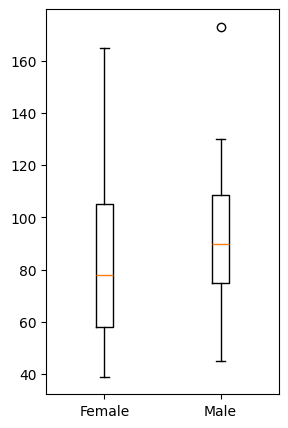

In [15]:
#carregar os dados filtrados da coluna 'Weight'
data = [data_female, data_male]

#configurar o tamanho
fig = plt.figure(figsize =(3,5))

# criar o boxplot
plt.boxplot(data,labels = ['Female', 'Male'])

plt.show()

Nos box plots disponibilizados, existem diversas diferenças e características que podem ser identificadas na comparação do peso dos géneros feminino e masculino:

1. **Mediana**: A linha laranja em cada caixa indica a mediana. A mediana no grupo feminino parece rondar os 80, enquanto no grupo masculino é um pouco superior, cerca de 85. Isto sugere que a mediana do peso é ligeiramente superior no género masculino.

2. **Amplitude Intercuartil (IQR)**: A altura da caixa representa o intervalo interquartil, que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). A caixa do género feminino é mais longa que a do género masculino, o que indica uma maior variabilidade nos pesos dentro do grupo de mulheres em comparação com os homens.

3. **Amplitude Total**: Os “bigodes” (as linhas que se estendem da parte superior e inferior de cada caixa) representam a faixa total do peso, excluindo valores discrepantes. Os bigodes no grupo feminino se estendem mais que no grupo masculino, indicando que há maior dispersão dos dados de peso nas mulheres.

4. **Valores Atípicos**: O círculo acima do bigode superior no box plot do sexo masculino representa um valor discrepante, indicando que há pelo menos um homem com peso significativamente maior que o resto. Não há outliers visíveis no boxplot feminino.

5. **Simetria**: A caixa do grupo masculino parece ser mais simétrica em relação à mediana, enquanto a caixa do grupo feminino apresenta um ligeiro viés para valores mais baixos (a mediana está mais próxima do primeiro quartil do que do terceiro).

Em resumo, enquanto o grupo masculino apresenta mediana mais elevada e presença de outliers no extremo superior da faixa de peso, o grupo feminino apresenta maior dispersão nos pesos.

## Histograma

Os histogramas são uma ferramenta para visualizar um grande número de valores únicos em um conjunto de dados de uma variável quantitativa. Essencialmente, um histograma divide esses valores em intervalos, comumente chamados de bins ou classes, para organizar as informações de uma forma mais compreensível. Frequentemente, esses intervalos são do mesmo tamanho, mas esta não é uma regra rígida.

Cada intervalo é definido por seus limites inferior e superior, conhecidos como limites. Frequência é o número de itens que se enquadram em cada intervalo, fornecendo uma medida de quão comuns são os valores dentro desse intervalo. Seguindo uma convenção padrão, os intervalos incluem valores iguais ao limite inferior, mas excluem valores iguais ao limite superior.

As informações de frequência são representadas visualmente pelas alturas das barras do histograma, que são colocadas adjacentes para facilitar a comparação entre os intervalos.

Este tipo de gráfico oferece uma representação clara e visual de como os dados estão distribuídos em intervalos ou classes, permitindo identificar padrões e tendências na variação dos valores presentes no conjunto de dados.



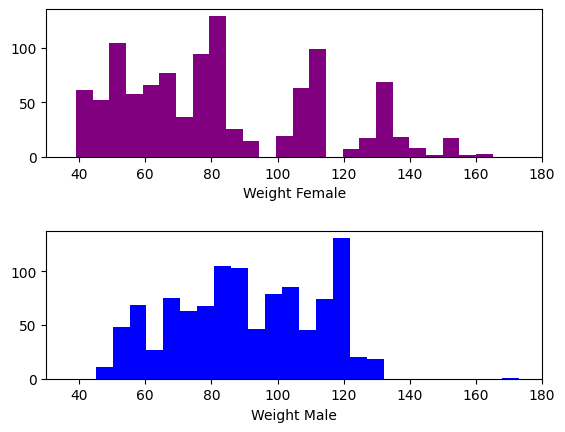

In [16]:


# Vamos fazer um histograma para a variável de peso para cada gênero.

x0 = data_female
x1 = data_male
fig, ax = plt.subplots(2,1)
ax[0].hist(x0, bins =25, color ='purple')
ax[1].hist(x1, bins=25, color='blue')

ax[0].set_xlabel('Weight Female')
ax[1].set_xlabel('Weight Male')

plt.subplots_adjust(hspace=0.5)  # Adicionamos um espaço entre os dois gráficos

# Definimos os mesmos limites no eixo x para os subplots

ax[0].set_xlim(30, 180)
ax[1].set_xlim(30, 180)


plt.show()

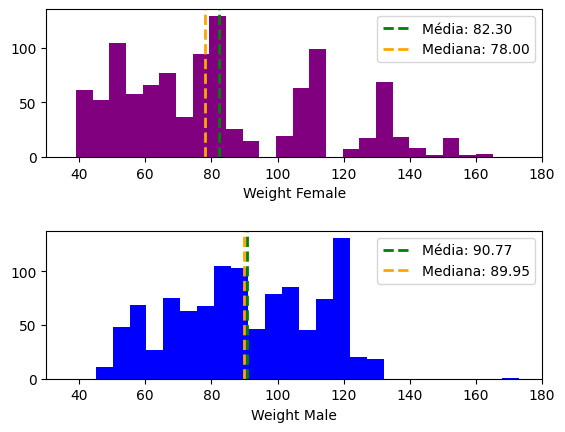

In [17]:
# Adicionamos algumas instruções ao código acima para poder exibir a média e a mediana.


x0 = data_female
x1 = data_male
fig, ax = plt.subplots(2,1)
ax[0].hist(x0, bins =25,color ='purple' )
ax[1].hist(x1,bins=25,color='blue')

ax[0].set_xlabel('Weight Female')
ax[1].set_xlabel('Weight Male')

plt.subplots_adjust(hspace=0.5)  # Adicionamos um espaço entre os dois gráficos

# Definimos os mesmos limites no eixo x para os subplots

ax[0].set_xlim(30, 180)
ax[1].set_xlim(30, 180)


# Calculamos a média e a mediana
mean_female = np.mean(data_female)
median_female = np.median(data_female)
mean_male = np.mean(data_male)
median_male = np.median(data_male)

# Desenhamos linhas verticais para a média e mediana no primeiro subplot
ax[0].axvline(mean_female, color='green', linestyle='dashed', linewidth=2, label=f'Média: {mean_female:.2f}')
ax[0].axvline(median_female, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana: {median_female:.2f}')
ax[0].legend()

# Desenhamos linhas verticais para a média e mediana no segundo subplot
ax[1].axvline(mean_male, color='green', linestyle='dashed', linewidth=2, label=f'Média: {mean_male:.2f}')
ax[1].axvline(median_male, color='orange', linestyle='dashed', linewidth=2, label=f'Mediana: {median_male:.2f}')
ax[1].legend()

plt.show()

### Interpretação de histogramas.



- **Média e Mediana:** Em ambos os histogramas, a linha tracejada verde representa a média do peso e a linha tracejada laranja indica a mediana (o valor central em um conjunto de dados ordenado).
   - Para o “Peso Feminino”, a média é 82,30 e a mediana é 78,0.
   - Para “Peso Masculino”, a média é 90,77 e a mediana é aproximadamente 89,95.

- **Viés:**
   - O histograma do “Peso Feminino” apresenta um viés para a direita (viés positivo), pois a cauda do gráfico se estende mais em direção aos valores maiores e a média é superior à mediana.
   - O histograma “Peso Masculino” também parece ter uma ligeira inclinação para a direita, mas é menos pronunciado em comparação com o feminino, pois a média e a mediana estão mais próximas uma da outra.

- **Simetria:**
   - Nenhum dos histogramas é perfeitamente simétrico.

- **Dispersão:**

   - Com base na aparência dos histogramas, verifica-se que o “Peso Feminino” tem uma dispersão ligeiramente maior do que o “Peso Masculino” porque as suas barras estão mais espalhadas e existe uma gama mais ampla de pesos representados.
   - A presença de pesos mais extremos (muito baixos ou muito altos) no histograma feminino também sugere maior dispersão nesse grupo em relação ao grupo masculino.



##Gráfico de dispersão XY:

O gráfico de dispersão ou gráfico XY representa os pares de dados de dois conjuntos de dados. O eixo horizontal x mostra os valores do conjunto x, enquanto o eixo vertical y mostra os valores correspondentes do conjunto. Opcionalmente, você pode incluir a linha de regressão e o coeficiente de correlação.

### Exemplo:

Considere o banco de dados mencionado no início e vamos analisar se existe alguma relação entre altura e peso.

In [18]:
# Identificamos os valores para x,y.
x = df['Height']
y= df['Weight']

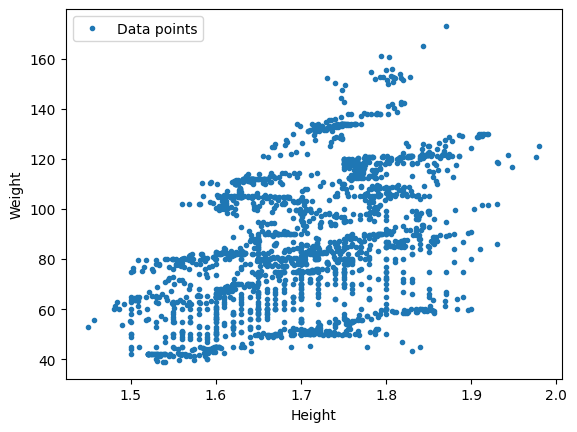

In [19]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
#ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.legend(facecolor='white')
plt.show()

**Lendo o gráfico:**: Há uma tendência de que à medida que a altura aumenta, o peso também tende a aumentar. Isso é comum, pois pessoas mais altas geralmente têm peso corporal maior.





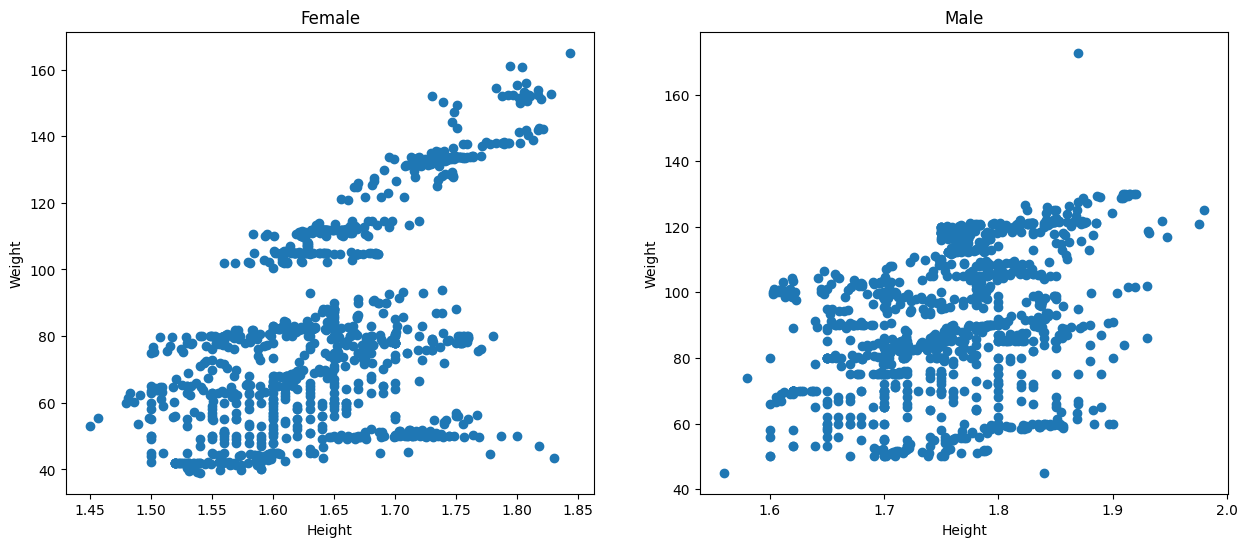

In [20]:
df_filtreded_f = df[df['Gender']=='Female']
df_filtreded_m = df[df['Gender']=='Male']


x1=df_filtreded_f['Height']
y1=df_filtreded_f['Weight']


x2=df_filtreded_m['Height']
y2=df_filtreded_m['Weight']

fig, axs = plt.subplots(1,2,figsize=(15, 6))
axs[0].plot(x1,y1,linewidth =0,marker ='o')
axs[1].plot(x2,y2,linewidth =0,marker ='o')
axs[0].set_title('Female')
axs[1].set_title('Male')

axs[0].set_xlabel('Height')
axs[0].set_ylabel('Weight')
axs[1].set_xlabel('Height')
axs[1].set_ylabel('Weight')

plt.show()

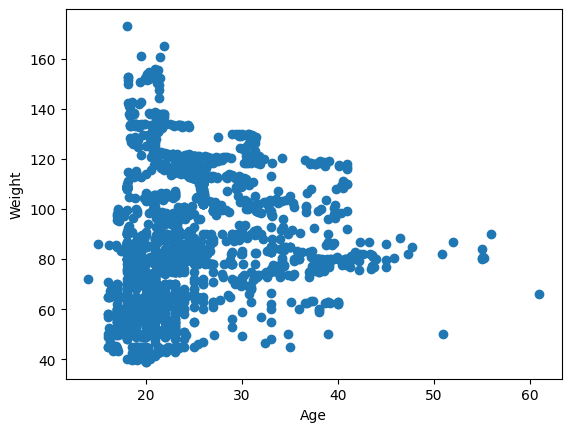

In [21]:
x=df['Age']
y=df['Weight']

fig, ax = plt.subplots()
ax.plot(x,y,linewidth =0,marker ='o')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
plt.show()

### Exemplo

No último mês de agosto, uma empresa especializada em serviços de personal training selecionou 50 instrutores de fitness na cidade com o objetivo de ampliar sua base de clientes. O número de sessões de formação que cada um destes 50 instrutores realizou foi o seguinte:

83 51 66 61 82 65 54 56 92 60
65 87 68 64 51 70 75 66 74 68
44 55 78 69 98 67 82 77 79 62
38 88 76 99 84 47 60 42 66 74
91 71 83 80 68 65 51 56 73 55

Gere um histograma para analisar a distribuição dos treinamentos realizados por esses instrutores. Que conclusões você tira das informações apresentadas no gráfico?

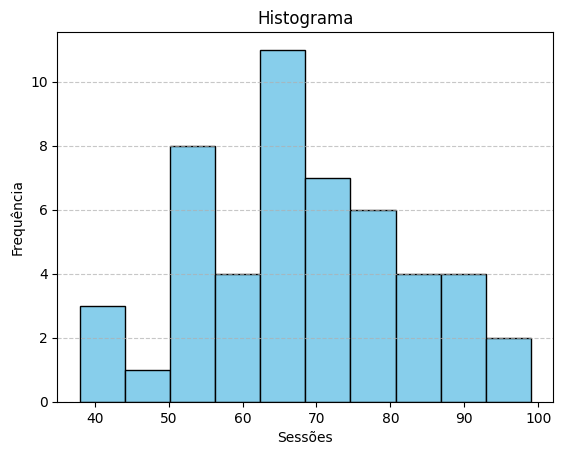

In [22]:
import matplotlib.pyplot as plt

dados_treinamento = [83, 51, 66, 61, 82, 65, 54, 56, 92, 60,
                          65, 87, 68, 64, 51, 70, 75, 66, 74, 68,
                          44, 55, 78, 69, 98, 67, 72, 77, 79, 62,
                          38, 88, 76, 99, 84, 47, 60, 42, 66, 74,
                          91, 71, 83, 80, 68, 65, 51, 56, 73, 55]

plt.hist(dados_treinamento, bins=10, color='skyblue', edgecolor='black')

plt.title('Histograma')
plt.xlabel('Sessões')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Diagrama de pontos

Um gráfico de pontos é útil para representar dados de forma que cada observação permaneça distinta e visível. Uma linha numérica horizontal é usada para localizar pontos que representam observações individuais, empilhando pontos de observações idênticas ou próximas para preservar sua identidade e permitir a visualização da forma da distribuição, bem como dos valores extremos e cumulativos dos dados. Este tipo de diagrama é especialmente benéfico para pequenos conjuntos de dados.

Suponha que a lista abaixo contenha as alturas de 50 jogadores de basquete.

Com que frequência cada medição de altura ocorre? Podemos encontrar a resposta desenhando o gráfico de pontos.

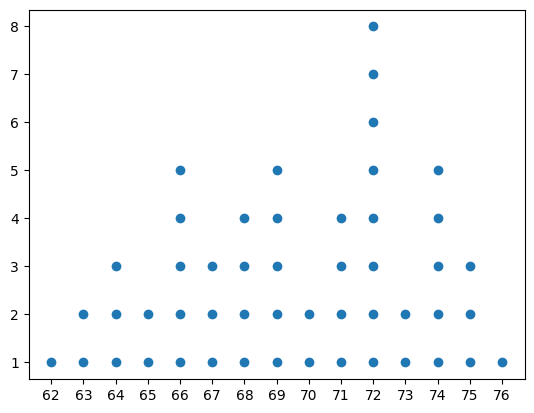

In [23]:
hs_heights = np.array([
    71, 67, 64, 72, 65, 69, 66, 68, 69, 72,
    69, 73, 69, 72, 73, 74, 76, 68, 66, 63,
    67, 71, 72, 74, 68, 69, 75, 71, 72, 72,
    65, 66, 72, 74, 66, 62, 75, 75, 64, 63,
    64, 66, 74, 67, 72, 70, 71, 70, 74, 68
])

import numpy as np
import matplotlib.pyplot as plt

def dotplot(input_x, **args):

    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts=True)

    # Convert 1D input into 2D array
    scatter_x = [] # x values
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)

    # draw dot plot using scatter()
    plt.scatter(scatter_x, scatter_y, **args)

    # Optional - show all unique values on x-axis.
    # Matplotlib might hide some of them
    plt.gca().set_xticks(unique_values)


# Draw dot plot using our new function
dotplot(input_x=hs_heights)


### Diagrama de caule e folha.

O gráfico de caule e folhas é uma técnica estatística usada para visualizar a distribuição de um conjunto de dados numéricos. Neste diagrama, cada número é dividido em dois componentes: o dígito inicial forma o “haste” e os dígitos restantes tornam-se as “folhas”. O caule é disposto verticalmente ao longo do eixo e os valores das folhas são alinhados horizontalmente ao longo do eixo, permitindo uma comparação visual da frequência dos valores nos dados.

Em Python, a biblioteca `stemgraphic` permite criar um diagrama de caule e folha.

In [24]:
#Para instalar o stemgraphic vamos usar pip,
import sys
!{sys.executable} -m pip install stemgraphic

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13856 sha256=b8ac51f9fc8fafce98d1081d820a0babe59a38c1520165251ac325280be797a2
  Stored in directory: c:\users\mathe\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt

   -------------------- ------------------- 1/2 [stemgraphic]
   ---------------------------------------- 2/2 [stemgraphic]



### Exemplo:

Faça um diagrama de tamanho e folha para os seguintes dados:


 96, 93, 88, 117, 127, 95, 113, 96, 108, 94, 148, 156, 139, 142, 94,
107, 125, 155, 155, 103, 112, 127, 117, 120, 112, 135, 132, 111, 125, 104, 106,
139, 134, 119, 97, 89, 118, 136, 125, 143, 120, 103, 113, 124, 138

(<Figure size 750x275 with 1 Axes>, <Axes: >)

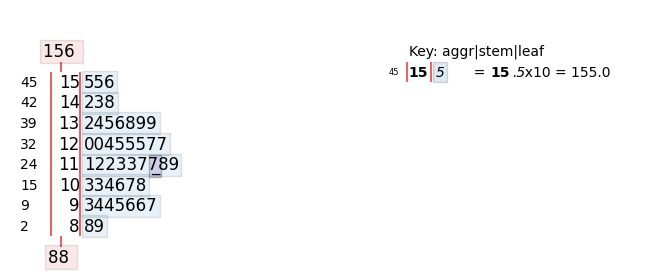

In [25]:
import stemgraphic

dados = [96, 93, 88, 117, 127, 95, 113, 96, 108, 94, 148, 156, 139, 142, 94,
107, 125, 155, 155, 103, 112, 127, 117, 120, 112, 135, 132, 111, 125, 104, 106,
139, 134, 119, 97, 89, 118, 136, 125, 143, 120, 103, 113, 124, 138]

stemgraphic.stem_graphic(dados, scale = 10)


(<Figure size 750x200 with 1 Axes>, <Axes: >)

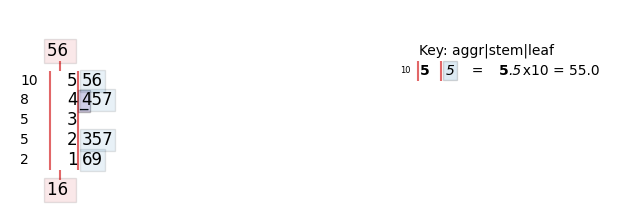

In [26]:
data = [16, 25, 47, 56, 23, 45, 19, 55, 44, 27]

# calling stem_graphic with required parameters,
# data and scale
stemgraphic.stem_graphic(data, scale = 10)

## Diagrama Circular ou Pizza


Os gráficos de pizza representam dados que possuem um pequeno número de rótulos com base em suas frequências. Um gráfico de pizza é um círculo dividido em várias fatias. Cada fatia corresponde a um rótulo diferente no conjunto de dados e possui uma área proporcional à frequência relativa associada a esse rótulo.

In [27]:
# Vamos analisar a variável Gênero e representar esta variável através de um gráfico circular

freq = df['Gender'].value_counts()
freq

Gender
Male      1068
Female    1043
Name: count, dtype: int64

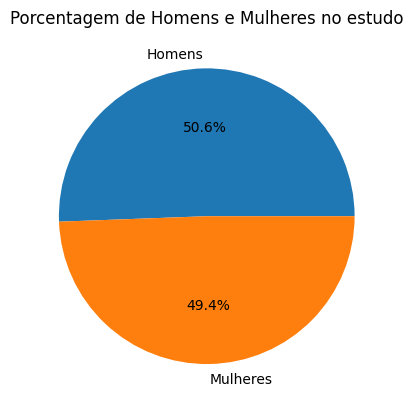

In [28]:
fig, ax = plt.subplots()
ax.pie(freq, labels=('Homens', 'Mulheres'), autopct='%1.1f%%')
ax.set_title('Porcentagem de Homens e Mulheres no estudo')
plt.show()

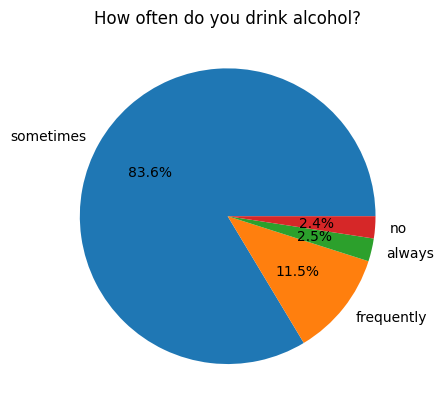

In [29]:
#Talvez seja mais conveniente fazer um diagrama circular caso
#a frequência é composta por pelo menos duas classes e menos de 5.
#Vamos pegar a variável CALC, que corresponde à pergunta: “Com que frequência você bebe álcool?” e fazer um diagrama circular.

freq_alcohol = df['CAEC'].value_counts()


fig, ax = plt.subplots()
ax.pie(freq_alcohol, labels= ('sometimes', 'frequently','always','no'), autopct='%1.1f%%')
ax.set_title('How often do you drink alcohol?')
plt.show()

In [30]:
freq_alcohol

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [31]:
# Pelo gráfico circular observamos que 83,6% consomem álcool às vezes.

### Gráfico de barras

O gráfico de barras é a ferramenta mais utilizada para representar graficamente variáveis ​​qualitativas, onde o eixo horizontal indica a variável e o eixo vertical mostra a frequência de cada categoria. Uma característica fundamental é que as barras são separadas por espaços, refletindo a sua natureza qualitativa. Essencialmente, uma série de retângulos de igual largura são usados ​​para representar visualmente a frequência de cada categoria na tabela de frequências.

A principal diferença entre um gráfico de barras e um histograma está no tipo de dados que representam: categóricos vs. contínuo e na forma como as barras são apresentadas em relação aos eixos e entre si.

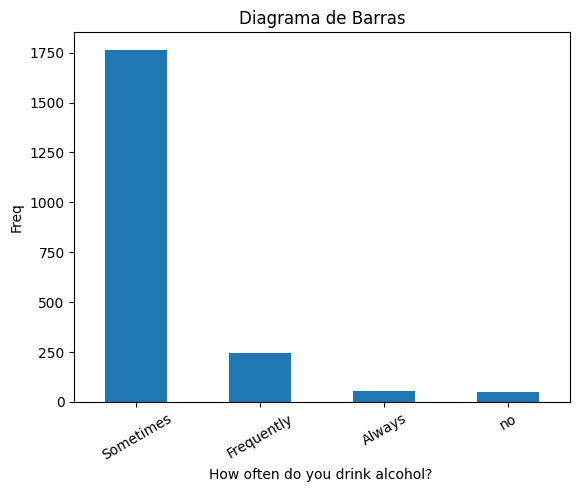

In [32]:
#Vamos pegar a variável CALC, que corresponde à pergunta: “Com que frequência você ingere álcool?”
#e vamos fazer um gráfico de barras.

freq_alcohol = df['CAEC'].value_counts()


# Depois criamos o gráfico de barras usando essas frequências
freq_alcohol.plot(kind='bar')

# Podemos adicionar labels e título para maior clareza
plt.xlabel('How often do you drink alcohol? ')
plt.ylabel('Freq')
plt.title('Diagrama de Barras')
plt.xticks(rotation=30, horizontalalignment="center")

# Finalmente, mostrar o gráfico
plt.show()


In [33]:
freq_alcohol

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64